In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from tqdm import tqdm
from scipy.ndimage import gaussian_filter1d
import pickle

In [2]:
NOTEBOOK_DIR = os.getcwd()
MODULE_DIR, _ = os.path.split(NOTEBOOK_DIR)
sys.path.append(MODULE_DIR)
OUT_DIR = os.path.join(MODULE_DIR, "outputs")

In [3]:
with open(os.path.join(OUT_DIR, "fractions_walking_resting_210605.pkl"), "rb") as f:
    data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['flies', 'fractions:'])

In [5]:
fly_dirs = data["flies"]
fly_dirs

['/mnt/NAS2/LH/210512/fly3',
 '/mnt/NAS2/LH/210514/fly1',
 '/mnt/NAS2/LH/210519/fly1',
 '/mnt/NAS2/LH/210521/fly1',
 '/mnt/NAS2/LH/210524/fly1',
 '/mnt/NAS2/LH/210526/fly2',
 '/mnt/NAS2/LH/210527/fly4',
 '/mnt/NAS2/LH/210531/fly2',
 '/mnt/NAS2/LH/210602/fly2',
 '/mnt/NAS2/LH/210603/fly2',
 '/mnt/NAS2/LH/210604/fly3']

In [6]:
fly_names = [fly_dir[13:19] for fly_dir in fly_dirs]
fly_names

['210512',
 '210514',
 '210519',
 '210521',
 '210524',
 '210526',
 '210527',
 '210531',
 '210602',
 '210603',
 '210604']

In [101]:
conditions = ["water", "caff", "caff", "nofeed", "bad", "caff", "nofeed", "caff", "sucr", "sucr", "nofeed"]

In [80]:
len(conditions) == len(fly_dirs)

True

In [63]:
fractions = data["fractions:"]

In [29]:
for i_fly, frac in enumerate(fractions):
    for i_trial, f in enumerate(frac):
        if f is (None, None):
            fractions[i_fly][i_trial] = (np.nan, np.nan)  # (None, None)

In [49]:
# fractions[4][9] = (np.nan, np.nan)
# fractions[7][1] = (np.nan, np.nan)
# fractions[7][3] = (np.nan, np.nan)
fractions[7]

[(0.0, 0.0),
 (nan, nan),
 (0.11364063969896519, 0.5732099926831817),
 (nan, nan),
 (0.0, 0.9974933708982433),
 (0.0, 0.9971816100052845),
 (0.0, 0.9979386782680754),
 (0.06124491645068167, 0.008291716711970838),
 (0.08604624289601126, 0.03970880211780278),
 (0.1126139370773302, 0.018912504725500903),
 (0.09604555453808666, 0.05697474922900418),
 (0.0, 0.9600493039443155),
 (0.00765648926528954, 0.3320832942696126),
 (0.0011125205348416478, 0.26245087234086795),
 (0.0, 0.14917990106743037)]

In [64]:
fractions_array = np.zeros((11, 15, 2))
fractions_array[:] = np.nan
for i_fly, fraction in enumerate(fractions):
    N_trials = len(fraction)
    fractions_array[i_fly, :N_trials, :] = np.array(fraction)

In [104]:
import longterm.plot as myplt

<IPython.core.display.Javascript object>


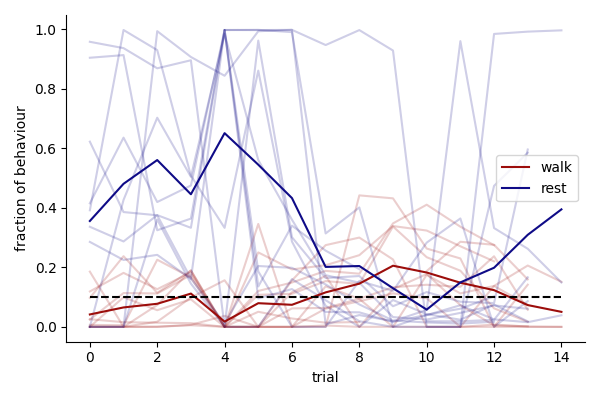

In [111]:
%matplotlib notebook
fig = plt.figure(figsize=(6,4))
plt.plot(fractions_array[:,:,0].T, color=myplt.DARKRED, alpha=0.2)
plt.plot(fractions_array[:,:,1].T, color=myplt.DARKBLUE, alpha=0.2)

plt.plot(np.nanmean(fractions_array[:,:,0], axis=0), color=myplt.DARKRED, label="walk")
plt.plot(np.nanmean(fractions_array[:,:,1], axis=0), color=myplt.DARKBLUE, label="rest")
plt.plot([0, 14], [0.1, 0.1], 'k--')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.xlabel("trial")
plt.ylabel("fraction of behaviour")
fig.tight_layout()

In [86]:
conditions

['water',
 'caff',
 'caff',
 'nofeed',
 'bad',
 'caff',
 'nofeed',
 'caff',
 'sucr',
 'sucr',
 'noffeed']

In [87]:
np.equal(conditions,"water")

UFuncTypeError: ufunc 'equal' did not contain a loop with signature matching types (dtype('<U7'), dtype('<U7')) -> dtype('bool')

In [92]:
selected_flies = [cond == "nofeed" for cond in conditions]
selected_flies

[False, False, False, True, False, False, True, False, False, False, False]

In [93]:
fractions_array[selected_flies,:,0]

array([[0.00000000e+00, 0.00000000e+00, 3.85465907e-04, 6.76657353e-03,
        3.69550444e-02, 0.00000000e+00, 0.00000000e+00, 4.59991877e-03,
        0.00000000e+00, 3.14679281e-04, 0.00000000e+00, 0.00000000e+00,
        1.37261528e-01, 7.41478056e-02,            nan],
       [0.00000000e+00, 9.94707217e-02, 5.60465528e-02, 9.25958816e-02,
        0.00000000e+00, 1.07790007e-01, 1.11172897e-01, 1.53780467e-01,
        1.44587569e-01, 3.37257735e-01, 2.34137745e-01, 1.88661769e-01,
        6.22606469e-02, 1.69628433e-02,            nan]])

<IPython.core.display.Javascript object>


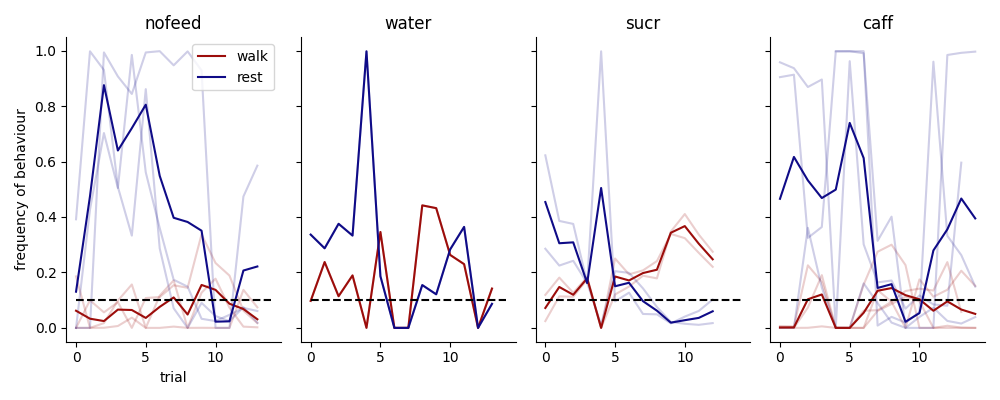

/home/jbraun/anaconda3/envs/longterm37/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/home/jbraun/anaconda3/envs/longterm37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/jbraun/anaconda3/envs/longterm37/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/home/jbraun/anaconda3/envs/longterm37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/jbraun/anaconda3/envs/longterm37/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/home/jbraun/anaconda3/envs/longterm37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [113]:
%matplotlib notebook

fig, axs = plt.subplots(1,4, figsize=(10, 4), sharex=True, sharey=True)

searchfor = ["nofeed", "water", "sucr", "caff"]
for i_cond, search in enumerate(searchfor):
    selected_flies = [cond == search for cond in conditions]


    axs[i_cond].plot(fractions_array[selected_flies,:,0].T, color=myplt.DARKRED, alpha=0.2)
    axs[i_cond].plot(fractions_array[selected_flies,:,1].T, color=myplt.DARKBLUE, alpha=0.2)

    axs[i_cond].plot(np.nanmean(fractions_array[selected_flies,:,0], axis=0), color=myplt.DARKRED, label="walk")
    axs[i_cond].plot(np.nanmean(fractions_array[selected_flies,:,1], axis=0), color=myplt.DARKBLUE, label="rest")
    axs[i_cond].plot([0, 14], [0.1, 0.1], 'k--')
    axs[i_cond].spines["top"].set_visible(False)
    axs[i_cond].spines["right"].set_visible(False)
    
    axs[i_cond].set_title(search)
    if i_cond == 0:
        axs[i_cond].legend()
        axs[i_cond].set_xlabel("trial")
        axs[i_cond].set_ylabel("frequency of behaviour")
fig.tight_layout()